In [31]:
import pandas
import matplotlib.pyplot as plt

df = pandas.read_csv('data/BTC-USD.csv')

In [33]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,7_day_rolling
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN
...,...,...,...,...,...,...,...,...
3435,2024-02-12,48296.386719,50280.476563,47745.761719,49958.222656,49958.222656,34511985805,46553.582589
3436,2024-02-13,49941.359375,50358.390625,48406.496094,49742.441406,49742.441406,35593051468,47504.692522
3437,2024-02-14,49733.445313,52021.371094,49296.832031,51826.695313,51826.695313,39105608050,48577.331473
3438,2024-02-15,51836.785156,52820.066406,51371.628906,51938.554688,51938.554688,38564360533,49525.472656


In [34]:
df['Date'] = pandas.to_datetime(df['Date'], format = "%Y-%m-%d")
df.set_index('Date', inplace = True)
df.head

<bound method NDFrame.head of                     Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2024-02-12  48296.386719  50280.476563  47745.761719  49958.222656   
2024-02-13  49941.359375  50358.390625  48406.496094  49742.441406   
2024-02-14  49733.445313  52021.371094  49296.832031  51826.695313   
2024-02-15  51836.785156  52820.066406  51371.628906  51938.554688   
2024-02-16  51937.726563  52365.917969  51767.210938  51841.062500   

               Adj Close       Volume  7_day_rolling  
Date

In [35]:
df.loc['2021']

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling
Date,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,27767.629185
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,28580.519252
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,29510.480469
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,30208.638393
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,31155.780134
...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,50150.236049
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,49957.699219
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,49645.727679


In [36]:
df1 = pandas.read_csv("Data/BTC-USD.csv", index_col = "Date", parse_dates = True)
df1.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-10',
               '2024-02-11', '2024-02-12', '2024-02-13', '2024-02-14',
               '2024-02-15', '2024-02-16'],
              dtype='datetime64[ns]', name='Date', length=3440, freq=None)

In [37]:
df.resample('ME').mean()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling
Date,,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07,409.022800
2014-10-31,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07,368.270328
2014-11-30,364.850235,376.494235,357.241832,366.099799,366.099799,2.199111e+07,363.050885
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07,346.962492
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07,256.910479
...,...,...,...,...,...,...,...
2023-10-31,29511.811114,30155.900454,29235.543977,29755.895161,29755.895161,1.536857e+10,29015.462072
2023-11-30,36491.666667,37092.602214,35960.923698,36596.164844,36596.164844,1.902878e+10,36270.005692
2023-12-31,42401.449849,43164.323715,41713.521421,42546.893523,42546.893523,2.328080e+10,42092.275526


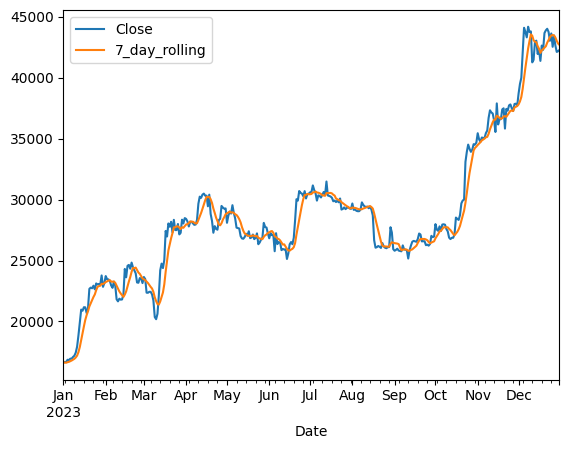

In [38]:
df['7_day_rolling']= df['Close'].rolling(window = 7).mean()
df[['Close', '7_day_rolling']].loc['2023'].plot()
plt.show()

In [39]:
df.resample('ME').mean()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

In [40]:
df['daily_returns'] = df ['Close'].pct_change() * 100

In [42]:
df[abs(df['daily_returns']) > 10].head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138995,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709


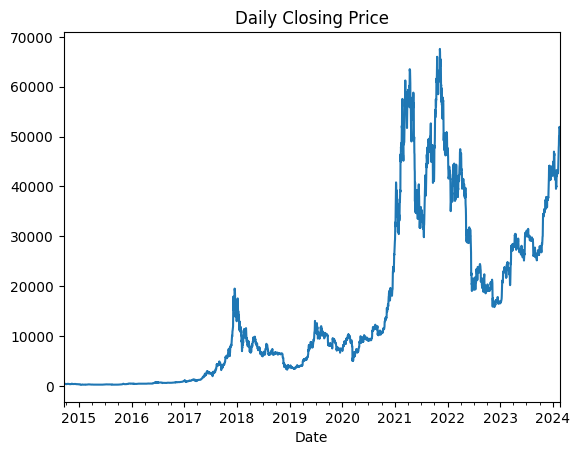

In [45]:
df['Close'].plot(title = 'Daily Closing Price')
plt.show()

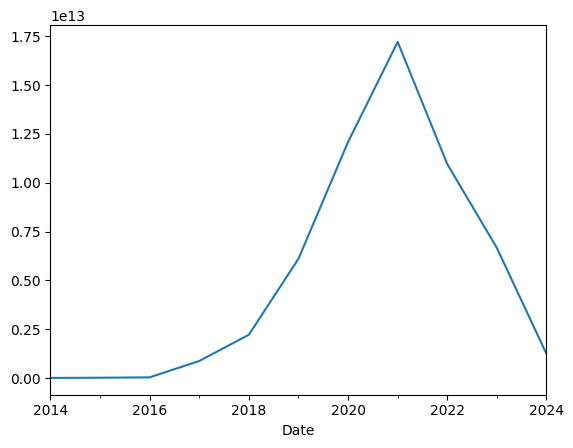

In [48]:
df.resample('YE').sum()['Volume'].plot()
plt.show()

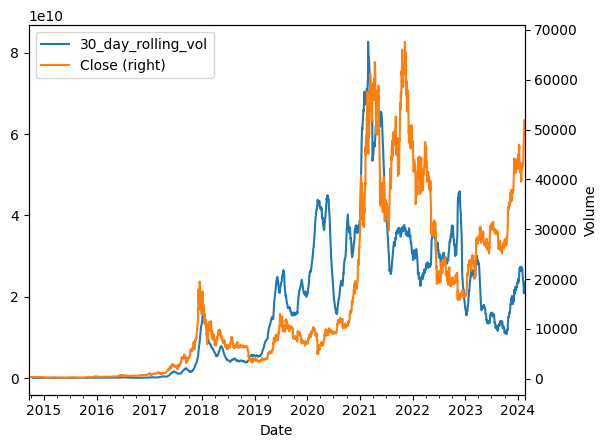

In [52]:
df['30_day_rolling_vol'] = df['Volume'].rolling(window =30).mean()
df['30_day_rolling_vol'].plot(legend = True)
ax = df['Close'].plot(secondary_y = True, legend = True)
ax.set_ylabel('Volume')
plt.show()

In [53]:
df[['Close','30_day_rolling_vol']].corr()

,Close,30_day_rolling_vol
Close,1.000000,0.744147
30_day_rolling_vol,0.744147,1.000000


In [58]:
df.isnull().sum()
df['30_day_rolling_vol'].fillna(method = 'bfill', inplace = True)
df['7_day_rolling'].interpolate(inplace = True)

C:\Users\mckays1\AppData\Local\Temp\ipykernel_19336\3196935452.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['30_day_rolling_vol'].fillna(method = 'bfill', inplace = True)
C:\Users\mckays1\AppData\Local\Temp\ipykernel_19336\3196935452.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['7_day_rolling'].interpolate(inplace = True)


In [60]:
df.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
7_day_rolling         6
daily_returns         1
30_day_rolling_vol    0
dtype: int64

In [65]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

df['is_weekend'] = df.index.weekday > 4
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns,30_day_rolling_vol,year,month,day,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984264,3.624856e+07,2014,9,19,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465855,3.624856e+07,2014,9,21,Sunday,6,True


In [66]:
df['closed_lag1'] = df['Close'].shift(1)
df['closed_lag2'] = df['Close'].shift(2)

In [67]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

ModuleNotFoundError: No module named 'statsmodels'